# ECON 566 - Pset 3 - Dili Maduabum, Joshua Bailey

## PROBLEM 1

### PART 1

In [1]:
import numpy as np

def gradient_descent(f, x0, grad_f, step_size_func, epsilon, gamma):
    """
    Performs gradient descent optimisation to minimize function f.

    Parameters:
    - f: Function to minimise.
    - x0: Starting point, array of shape (p,).
    - grad_f: Gradient of f, function returning array.
    - step_size_func: Function to calculate step size, takes parameters (f, grad_f_at_xk, k, xk, gamma).
    - epsilon: Stopping criterion threshold for the gradient norm.
    - gamma: Tuning parameter for step size calculation.

    Returns:
    - xk: The approximation to the minimum.
    - k: Number of iterations performed.
    """
    xk = x0
    k = 0
    while np.linalg.norm(grad_f(xk)) > epsilon:
        sz = step_size_func(f, grad_f(xk), k, xk, gamma)
        xk = xk - sz * grad_f(xk)
        k += 1
    
    return xk, k


### PART 2

In [2]:
# Constant step size
def constant_step_size(f, grad_f_at_xk, k, xk, gamma=0.01):
    """
    Computes a constant step size.

    Parameters:
    - f, grad_f_at_xk, k, xk: Parameters as above (not used in this version).
    - gamma: Constant step size.

    Returns:
    - gamma: The constant step size.
    """
    return gamma

# Decreasing step size 
def decreasing_step_size(f, grad_f_at_xk, k, xk, gamma=None):
    """
    Computes a decreasing step size, inversely proportional to the iteration number.

    Parameters:
    - f, grad_f_at_xk, xk, gamma: Parameters as above (not used in this version).
    - k: The current iteration number.

    Returns:
    - step size: A value decreasing with k, specifically 1/k.
    """
    if k == 0:
        return 1  # Handle division by zero for the first iteration
    else:
        return 1 / k

# Backtracking line search
def backtracking_line_search(f, grad_f_at_xk, k, xk, gamma=0.9, alpha=0.01):
    """
    Performs backtracking line search to compute the step size.

    Parameters:
    - f: The function being minimised.
    - grad_f_at_xk: The gradient of f at the current point xk.
    - k: The current iteration number (unused in this function).
    - xk: The current point in the iteration.
    - gamma: Reduction factor for the step size, default is 0.9.
    - alpha: Parameter controlling the sufficiency of decrease, default is 0.01.

    Returns:
    - t: The computed step size after backtracking.
    """
    t = 1
    while f(xk - t * grad_f_at_xk) > f(xk) - alpha * t * np.dot(grad_f_at_xk, grad_f_at_xk):
        t *= gamma
    return t


### PART 3

#### 3(a)

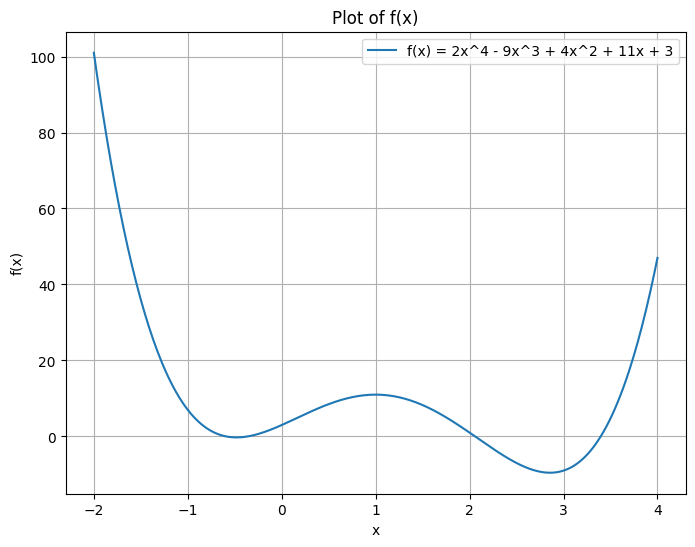

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function
def f(x):
    return 2*x**4 - 9*x**3 + 4*x**2 + 11*x + 3

# Generate x values from -2 to 4
x_values = np.linspace(-2, 4, 400)

# Compute y values
y_values = f(x_values)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, label='f(x) = 2x^4 - 9x^3 + 4x^2 + 11x + 3')
plt.title('Plot of f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()


#### 3(b)

No, the function is not convex in the interval $[-2, 4]$. It exhibits multiple distinct pairs of points on the graph of the function where the line segment connecting the points is not above the graph.

#### 3(c)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Function
def f(x):
    return 2*x**4 - 9*x**3 + 4*x**2 + 11*x + 3

# Gradient of the function
def grad_f(x):
    return 8*x**3 - 27*x**2 + 8*x + 11

# Gradient descent algorithm
def gradient_descent(f, x0, grad_f, step_size_func, epsilon, gamma=0.01, lower_bound=-2, upper_bound=4):
    xk = x0
    k = 0
    while np.linalg.norm(grad_f(xk)) > epsilon:
        sz = step_size_func(f, grad_f(xk), k, xk, gamma)
        xk_new = xk - sz * grad_f(xk)
        xk_new = np.clip(xk_new, lower_bound, upper_bound) # Optimise over the interval
        xk = xk_new
        k += 1
    return xk, k

#Implement the three methods
# Constant step size
def constant_step_size(f, grad_f_at_xk, k, xk, gamma=0.01):
    return gamma

# Decreasing step size
def decreasing_step_size(f, grad_f_at_xk, k, xk, gamma=None):
    return 1 / (k + 1)  # +1 to handle the case when k=0

# Backtracking line search
def backtracking_line_search(f, grad_f_at_xk, k, xk, gamma=0.9, alpha=0.01):
    t = 1
    while f(xk - t * grad_f_at_xk) > f(xk) - alpha * t * np.dot(grad_f_at_xk, grad_f_at_xk):
        t *= gamma
    return t

# Parameters
x0 = np.array([-2])
epsilon = 0.001

# Results
results = {}

# Applying gradient descent with each method
for method_name, step_size_func, gamma_val in [
    ("Constant", constant_step_size, 0.01),
    ("Decreasing", decreasing_step_size, None),
    ("Backtracking", backtracking_line_search, 0.9)]:
    
    start_time = time.time()
    x_min, iterations = gradient_descent(f, x0, grad_f, step_size_func, epsilon, gamma=gamma_val)
    end_time = time.time()
    
    results[method_name] = {
        "Iterations": iterations, 
        "Time": end_time - start_time, 
        "x_min": x_min
    }

# Print results
for method, info in results.items():
    print(f"{method}: Iterations = {info['Iterations']}, Time = {info['Time']:.4f} seconds, x_min = {info['x_min']}")


Constant: Iterations = 21, Time = 0.0007 seconds, x_min = [-0.48136221]
Decreasing: Iterations = 34, Time = 0.0010 seconds, x_min = [2.85638891]
Backtracking: Iterations = 84, Time = 0.0592 seconds, x_min = [2.85639764]


The decreasing and backtracking methods found the global minimum but the decreasing method was quicker (34 vs. 84 iterations, and 0.0018 vs 0.0611 seconds, respectively). The constant method converged to the other local minimum. 

#### 3(d)

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Function
def f(x):
    return 2*x**4 - 9*x**3 + 4*x**2 + 11*x + 3

# Gradient of the function
def grad_f(x):
    return 8*x**3 - 27*x**2 + 8*x + 11

# Gradient descent algorithm
def gradient_descent(f, x0, grad_f, step_size_func, epsilon, gamma=0.01, lower_bound=-2, upper_bound=4):
    xk = x0
    k = 0
    while np.linalg.norm(grad_f(xk)) > epsilon:
        sz = step_size_func(f, grad_f(xk), k, xk, gamma)
        xk_new = xk - sz * grad_f(xk)
        xk_new = np.clip(xk_new, lower_bound, upper_bound) # Optimise over the interval
        xk = xk_new
        k += 1
    return xk, k

#Implement the three methods
# Constant step size
def constant_step_size(f, grad_f_at_xk, k, xk, gamma=0.01):
    return gamma

# Decreasing step size
def decreasing_step_size(f, grad_f_at_xk, k, xk, gamma=None):
    return 1 / (k + 1)  # +1 to handle the case when k=0

# Backtracking line search
def backtracking_line_search(f, grad_f_at_xk, k, xk, gamma=0.9, alpha=0.01):
    t = 1
    while f(xk - t * grad_f_at_xk) > f(xk) - alpha * t * np.dot(grad_f_at_xk, grad_f_at_xk):
        t *= gamma
    return t

# Parameters
x0 = np.array([1])
epsilon = 0.001

# Results
results = {}

# Applying gradient descent with each method
for method_name, step_size_func, gamma_val in [
    ("Constant", constant_step_size, 0.01),
    ("Decreasing", decreasing_step_size, None),
    ("Backtracking", backtracking_line_search, 0.9)]:
    
    start_time = time.time()
    x_min, iterations = gradient_descent(f, x0, grad_f, step_size_func, epsilon, gamma=gamma_val)
    end_time = time.time()
    
    results[method_name] = {
        "Iterations": iterations, 
        "Time": end_time - start_time, 
        "x_min": x_min
    }

# Print results
for method, info in results.items():
    print(f"{method}: Iterations = {info['Iterations']}, Time = {info['Time']:.4f} seconds, x_min = {info['x_min']}")


Constant: Iterations = 0, Time = 0.0000 seconds, x_min = [1]
Decreasing: Iterations = 0, Time = 0.0000 seconds, x_min = [1]
Backtracking: Iterations = 0, Time = 0.0000 seconds, x_min = [1]


All methods converged to the local maximum the algorithm began on (discussed below).

#### 3(e)
Yes, in part(d) the algorithm got stuck at $x=1$, the gradient ($\nabla f(x)$) is zero, which can lead the algorithm to conclude it has found an optimum since the stopping criterion is based on the gradient's magnitude ($|\nabla f(x^k)\|_2 \leq \varepsilon$). Specifically, the algorithm checks if the norm of the gradient is less than or equal to a small epsilon value. When this condition fails, the iterations stop. The algorithm may "think" it has already converged to an optimal solution and terminate immediately, performing no iterations.

This limitation of shows the importance of the starting point selection. It also could be addressed by modifying the algorithm, for instance, adding small perturbations if the algorithm starts at a point with a zero gradient.  


## Problem 2

### PART 1

$$
\begin{equation}
g_{x, y}(\beta) = y - \sum^p_{j =1} x_i\beta_j, \text{ $\forall \lambda \in [0,1]$, $\beta^1, \beta^2 \in \mathbb{R}^p$}
\end{equation}
$$
is convex if:

$g_{x, y}(\lambda\beta^1 + (1 - \lambda)\beta^2) \le \lambda g_{x, y}(\beta^1) + (1-\lambda)g_{x, y}(\beta^2)$ 

Proof:

$g_{x, y}(\lambda\beta^1 + (1 - \lambda)\beta^2)$ 

$= y - \sum^p_{j =1} x_i(\lambda\beta^1 + (1 - \lambda)\beta^2)_j$

$= y - \lambda\sum^p_{j =1} x_i\beta_j^1 - (1 - \lambda)\sum^p_{j =1}x_i\beta_j^2$

$= y - \lambda\sum^p_{j =1} x_i\beta_j^1 - \sum^p_{j =1}x_i\beta_j^2 + \lambda \sum^p_{j =1}x_i\beta_j^2$

$\pm \lambda y$

$= y + \pmb{\lambda y} - \lambda \sum^p_{j =1}x_i\beta_j^1 - \sum^p_{j =1}x_i\beta_j^2 - \pmb{\lambda y} + \lambda \sum^p_{j =1}x_i\beta_j^2$

Collect like terms..

$= \lambda (y - \sum^p_{j =1}x_i\beta_j^1) + (1-\lambda)y - (1-\lambda)\sum^p_{j =1}x_i\beta_j^2$

$= \lambda (y - \sum^p_{j =1}x_i\beta_j^1) + (1-\lambda)(y - \sum^p_{j =1}x_i\beta_j^2)$

$= \lambda g_{x, y}(\beta^1) + (1-\lambda)g_{x, y}(\beta^2)$

which is convex by definition, since they are equal, by linearity


$$\require{cancel}$$
### PART 2

$h(z) = z^2$ is convex if:

$h(\lambda x + (1 - \lambda)y) \le \lambda h(x) + (1-\lambda)h(y)$

Proof:

$h(\lambda x + (1 - \lambda)y)$

$= (\lambda x + (1 - \lambda)y)^2$

$= (\lambda x)^2 + ((1 - \lambda)y)^2 + 2(\lambda x)((1 - \lambda)y)$

$= (\lambda x)^2 + ((1 - \lambda)y)^2 + (2xy)\lambda(1 - \lambda)$

$\le \lambda^2 x^2 + (1 - \lambda)^2y^2 + (x^2+ y^2)\lambda(1-\lambda)$, by youngs inequality

$\le \lambda^2 x^2 + (1 - \lambda)^2y^2 + x^2\lambda(1-\lambda) + y^2\lambda(1-\lambda)$

$\le (\lambda^2 + \lambda(1-\lambda))x^2 + ((1 - \lambda)^2 + \lambda(1-\lambda))y^2$

$\le (\cancel{\lambda^2}+\lambda \cancel{-\lambda^2})x^2 + (1 - 2\lambda \cancel{+ \lambda^2} + \lambda \cancel{-\lambda^2})y^2$

$\le \lambda x^2 + (1-\lambda)y^2$

$\le \lambda h(x) + (1-\lambda)h(y)$///

### PART 3

$q_{x,y}(\beta) = h(g_{x,y}(\beta))$ is convex if

$h(\lambda g_{x,y}(a) + (1-\lambda)g_{x,y}(b)) \le \lambda h(g_{x,y}(a)) + (1-\lambda)h(g_{x,y}(b)) \text{     $\forall a,b \in \mathbb{R}^p$}$

Proof:

$h(\lambda g_{x,y}(a) + (1-\lambda)g_{x,y}(b))$

$= (\lambda g_{x,y}(a) + (1-\lambda)g_{x,y}(b))^2$

$= (\lambda (y - \sum^p_{j =1}x_ia_j) + (1-\lambda)(y - \sum^p_{j =1}x_ib_j))^2$

$= (\cancel{\lambda y} - \lambda \sum^p_{j =1}x_ia_j + y - \sum^p_{j =1}x_ib_j \cancel{-\lambda y} + \lambda \sum^p_{j =1}x_ib_j))^2$

$= (- \lambda \sum^p_{j =1}x_ia_j + y - \sum^p_{j =1}x_ib_j  + \lambda \sum^p_{j =1}x_ib_j))^2$

$= (( y - \lambda \sum^p_{j =1}x_ia_j)- (\sum^p_{j =1}x_ib_j - \lambda \sum^p_{j =1}x_ib_j))^2$

$= (y - \lambda \sum^p_{j =1}x_ia_j)^2 -2(y - \lambda \sum^p_{j =1}x_ia_j)(\sum^p_{j =1}x_ib_j - \lambda \sum^p_{j =1}x_ib_j)$
$+ (\sum^p_{j =1}x_ib_j - \lambda \sum^p_{j =1}x_ib_j)^2$


$= (y^2 -\lambda 2y\sum^p_{j =1}x_ia_j + \lambda^2 (\sum^p_{j =1}x_ia_j)^2) - 2y\sum^p_{j =1}x_ib_j + \lambda 2y\sum^p_{j =1}x_ib_j$ 
$+ \lambda 2(\sum^p_{j =1}x_ia_j\sum^p_{j =1}x_ib_j) - \lambda^2 2(\sum^p_{j =1}x_ia_j\sum^p_{j =1}x_ib_j)+ ((\sum^p_{j =1}x_ib_j)^2$ 
$- \lambda2(\sum^p_{j =1}x_ib_j)^2 + \lambda^2 (\sum^p_{j =1}x_ib_j)^2)$

$= (y^2 -\lambda 2y\sum^p_{j =1}x_ia_j + \lambda^2 (\sum^p_{j =1}x_ia_j)^2)- 2y\sum^p_{j =1}x_ib_j$
$+ \lambda 2y\sum^p_{j =1}x_ib_j + (\lambda  - \lambda^2)[2(\sum^p_{j =1}x_ia_j\sum^p_{j =1}x_ib_j)]$
$+ ((\sum^p_{j =1}x_ib_j)^2 - \lambda2(\sum^p_{j =1}x_ib_j)^2+\lambda^2 (\sum^p_{j =1}x_ib_j)^2)$

$\le (y^2 -\lambda 2y\sum^p_{j =1}x_ia_j + \lambda^2 (\sum^p_{j =1}x_ia_j)^2)$ 
$- 2y\sum^p_{j =1}x_ib_j + \lambda 2y\sum^p_{j =1}x_ib_j + (\lambda  - \lambda^2)\pmb{[(\sum^p_{j =1}x_ia_j)^2 + (\sum^p_{j =1}x_ib_j)^2]} $
$+ ( (\sum^p_{j =1}x_ib_j)^2 - \lambda2(\sum^p_{j =1}x_ib_j)^2 + \lambda^2 (\sum^p_{j =1}x_ib_j)^2)$, by Young's Inequality

$\le (y^2 -\lambda 2y\sum^p_{j =1}x_ia_j + \lambda^2 (\sum^p_{j =1}x_ia_j)^2) - 2y\sum^p_{j =1}x_ib_j + \lambda 2y\sum^p_{j =1}x_ib_j + \lambda(\sum^p_{j =1}x_ia_j)^2 $
$+ \lambda(\sum^p_{j =1}x_ib_j)^2 - \lambda^2(\sum^p_{j =1}x_ia_j)^2 - \lambda^2(\sum^p_{j =1}x_ib_j)^2 + ( (\sum^p_{j =1}x_ib_j)^2 - \lambda2(\sum^p_{j =1}x_ib_j)^2 $
$+ \lambda^2 (\sum^p_{j =1}x_ib_j)^2)$

$\le y^2 -\lambda 2y\sum^p_{j =1}x_ia_j +  \cancel{\lambda^2 (\sum^p_{j =1}x_ia_j)^2}- 2y\sum^p_{j =1}x_ib_j + \lambda 2y\sum^p_{j =1}x_ib_j $
$+ \lambda(\sum^p_{j =1}x_ia_j)^2 + \lambda(\sum^p_{j =1}x_ib_j)^2  \cancel{- \lambda^2(\sum^p_{j =1}x_ia_j)^2}  \cancel{- \lambda^2(\sum^p_{j =1}x_ib_j)^2} $
$+  (\sum^p_{j =1}x_ib_j)^2 - \lambda2(\sum^p_{j =1}x_ib_j)^2 +  \cancel{\lambda^2 (\sum^p_{j =1}x_ib_j)^2}$

$\le y^2 -\lambda 2y\sum^p_{j =1}x_ia_j- 2y\sum^p_{j =1}x_ib_j + \lambda 2y\sum^p_{j =1}x_ib_j$ 
$+ \lambda(\sum^p_{j =1}x_ia_j)^2 - \lambda(\sum^p_{j =1}x_ib_j)^2  +  (\sum^p_{j =1}x_ib_j)^2$

Collect like terms:

$\le  -\lambda 2y\sum^p_{j =1}x_ia_j + \lambda(\sum^p_{j =1}x_ia_j)^2+ y^2 - 2y\sum^p_{j =1}x_ib_j +  (\sum^p_{j =1}x_ib_j)^2 $
$+ \lambda 2y\sum^p_{j =1}x_ib_j- \lambda(\sum^p_{j =1}x_ib_j)^2 $


Add and substract $\lambda y^2$:


$ \le \pmb{\lambda y^2} -\lambda 2y\sum^p_{j =1}x_ia_j + \lambda(\sum^p_{j =1}x_ia_j)^2+ y^2 - 2y\sum^p_{j =1}x_ib_j +  (\sum^p_{j =1}x_ib_j)^2 $
$-\pmb{\lambda y^2}+ \lambda 2y\sum^p_{j =1}x_ib_j - \lambda(\sum^p_{j =1}x_ib_j)^2 $


$ \le \lambda(y^2 - 2y\sum^p_{j =1}x_ia_j + (\sum^p_{j =1}x_ia_j)^2) + (1 - \lambda)(y^2 - 2y\sum^p_{j =1}x_ib_j + (\sum^p_{j =1}x_ib_j)^2) $


$ \le \lambda(y - \sum^p_{j =1}x_ia_j)^2 + (1 - \lambda)(y - \sum^p_{j =1}x_ib_j)^2 $

$ \le \lambda(g_{x,y}(a))^2 + (1 - \lambda)(g_{x,y}(b))^2 $

$ \le \lambda h(g_{x,y}(a)) + (1 - \lambda)h(g_{x,y}(b))$ ///



### PART 4

$t(\lambda x + (1 - \lambda)y)$ 

$= r(\lambda x + (1 - \lambda)y) + s(\lambda x + (1 - \lambda)y)$

$\le \lambda r(x) + (1 - \lambda)r(y) + \lambda s(x) + (1 - \lambda)s(y)$ since $r(z)$ and $s(z)$ are convex

$\le \lambda (r(x) +s(x)) + (1 - \lambda)(r(y) + s(y))$

$\le \lambda t(x) + (1 - \lambda) t(y)$

which is convex

### PART 5

Claim:
$$\begin{equation}
v(z) = \sum^{n}_{i=1}v_i(z)
\end{equation}$$

is convex.

Proof by induction:

<u>Base Case</u>

From part 4 above, we saw that:

$r(\lambda x + (1 - \lambda)y) + s(\lambda x + (1 - \lambda)y) \le \lambda (r(x) +s(x)) + (1 - \lambda)(r(y) + s(y))$

let $r(z) = v_1(z)$ and $s(z) = v_2(z)$. Thus, for n = 2,

$v_1(\lambda x + (1 - \lambda)y) + v_2(\lambda x + (1 - \lambda)y) \le \lambda (v_1(x) +v_2(x)) + (1 - \lambda)(v_1(y) + v_2(y))$

<u>Inductive Hypothesis</u>

$\sum^m_{i=1}v_i(\lambda x + (1 - \lambda)y) \le \lambda \sum^m_{i=1}v_i(x) + (1 - \lambda)\sum^m_{i=1}v_i(y)$ for some finite m

<u>Inductive Step</u>

Consider:

$$\begin{equation}
\sum^{m+1}_{i=1}v_i(\lambda x + (1 - \lambda)y)
\end{equation}$$

$= \sum^m_{i=1}v_i(\lambda x + (1 - \lambda)y) + v_{m+1}(\lambda x + (1-\lambda)y)$

$\le \underbrace{\lambda \sum^m_{i=1}v_i(x) + (1 - \lambda)\sum^m_{i=1}v_i(y)}_{\text{by the inductive hypothesis}} + \underbrace{\lambda v_{m+1}(x)+ (1-\lambda)v_{m+1}(y)}_{\text{since $v_i(z)$ is convex}}$

collect like terms:

$\le \lambda (\sum^m_{i=1}v_i(x) + v_{m+1}(x)) + (1 - \lambda)(\sum^m_{i=1}v_i(y) + v_{m+1}(y))$

$\le \lambda \sum^{m+1}_{i=1}v_i(x) + (1 - \lambda)\sum^{m+1}_{i=1}v_i(y)$

Thus by induction, $v(z) = \sum^{n}_{i=1}v_i(z)$ is convex

### PART 6

$$
\begin{equation}
f(\beta) = \sum^n_{i = 1} (y_i - \sum^p_{j =1} x_i\beta_j)^2
\end{equation}
$$

is convex if:

$f(\lambda a + (1-\lambda)b) \le \lambda f(a) + (1-\lambda)f(b)$

Proof:

$f(\lambda a + (1-\lambda)b)$


$= \sum^n_{i = 1} [y_i - \sum^p_{j =1}x_i(\lambda a + (1-\lambda)b)_j]^2$

$= \sum^n_{i = 1} (y_i - \lambda \sum^p_{j =1}x_ia_j - \sum^p_{j =1}x_ib_j +\lambda \sum^p_{j =1}x_ib_j)^2$

$= \sum^n_{i = 1} (( y_i - \lambda \sum^p_{j =1}x_ia_j)- (\sum^p_{j =1}x_ib_j - \lambda \sum^p_{j =1}x_ib_j))^2$


$=\sum^n_{i =1} [(y_i - \lambda \sum^p_{j =1}x_ia_j)^2 -2(y - \lambda \sum^p_{j =1}x_ia_j)(\sum^p_{j =1}x_ib_j - \lambda \sum^p_{j =1}x_ib_j)$
$+ (\sum^p_{j =1}x_ib_j - \lambda \sum^p_{j =1}x_ib_j)^2]$


$=\sum^n_{i =1} [(y^2 -\lambda 2y\sum^p_{j =1}x_ia_j + \lambda^2 (\sum^p_{j =1}x_ia_j)^2) - 2y\sum^p_{j =1}x_ib_j + \lambda 2y\sum^p_{j =1}x_ib_j$ 
$+ \lambda 2(\sum^p_{j =1}x_ia_j\sum^p_{j =1}x_ib_j) - \lambda^2 2(\sum^p_{j =1}x_ia_j\sum^p_{j =1}x_ib_j)+ ((\sum^p_{j =1}x_ib_j)^2$ 
$- \lambda2(\sum^p_{j =1}x_ib_j)^2 + \lambda^2 (\sum^p_{j =1}x_ib_j)^2)]$

$=\sum^n_{i =1} [(y^2 -\lambda 2y\sum^p_{j =1}x_ia_j + \lambda^2 (\sum^p_{j =1}x_ia_j)^2)- 2y\sum^p_{j =1}x_ib_j + \lambda 2y\sum^p_{j =1}x_ib_j$
$+ (\lambda  - \lambda^2)[2(\sum^p_{j =1}x_ia_j\sum^p_{j =1}x_ib_j)]$
$+ ((\sum^p_{j =1}x_ib_j)^2 - \lambda 2(\sum^p_{j =1}x_ib_j)^2+\lambda^2 (\sum^p_{j =1}x_ib_j)^2)]$

$\le \sum^n_{i =1} [(y^2 -\lambda 2y\sum^p_{j =1}x_ia_j + \lambda^2 (\sum^p_{j =1}x_ia_j)^2)$ 
$- 2y\sum^p_{j =1}x_ib_j + \lambda 2y\sum^p_{j =1}x_ib_j + (\lambda  - \lambda^2)\pmb{[(\sum^p_{j =1}x_ia_j)^2 + (\sum^p_{j =1}x_ib_j)^2]} $
$+ ( (\sum^p_{j =1}x_ib_j)^2 - \lambda 2(\sum^p_{j =1}x_ib_j)^2 + \lambda^2 (\sum^p_{j =1}x_ib_j)^2)]$, by Young's Inequality

$\le \sum^n_{i =1}[(y^2 -\lambda 2y\sum^p_{j =1}x_ia_j + \lambda^2 (\sum^p_{j =1}x_ia_j)^2) - 2y\sum^p_{j =1}x_ib_j + \lambda 2y\sum^p_{j =1}x_ib_j$
$+ \lambda(\sum^p_{j =1}x_ia_j)^2 + \lambda(\sum^p_{j =1}x_ib_j)^2 - \lambda^2(\sum^p_{j =1}x_ia_j)^2 - \lambda^2(\sum^p_{j =1}x_ib_j)^2$
$+ ( (\sum^p_{j =1}x_ib_j)^2 - \lambda2(\sum^p_{j =1}x_ib_j)^2 + \lambda^2 (\sum^p_{j =1}x_ib_j)^2)]$

$\le \sum^n_{i =1}[y^2 -\lambda 2y\sum^p_{j =1}x_ia_j +  \cancel{\lambda^2 (\sum^p_{j =1}x_ia_j)^2}- 2y\sum^p_{j =1}x_ib_j + \lambda 2y\sum^p_{j =1}x_ib_j $
$+ \lambda(\sum^p_{j =1}x_ia_j)^2 + \lambda(\sum^p_{j =1}x_ib_j)^2  \cancel{- \lambda^2(\sum^p_{j =1}x_ia_j)^2}  \cancel{- \lambda^2(\sum^p_{j =1}x_ib_j)^2} $
$+  (\sum^p_{j =1}x_ib_j)^2 - \lambda2(\sum^p_{j =1}x_ib_j)^2 +  \cancel{\lambda^2 (\sum^p_{j =1}x_ib_j)^2}]$

$\le \sum^n_{i =1} [y^2 -\lambda 2y\sum^p_{j =1}x_ia_j- 2y\sum^p_{j =1}x_ib_j + \lambda 2y\sum^p_{j =1}x_ib_j$ 
$+ \lambda(\sum^p_{j =1}x_ia_j)^2 - \lambda(\sum^p_{j =1}x_ib_j)^2  +  (\sum^p_{j =1}x_ib_j)^2]$

Collect like terms:

$\le \sum^n_{i =1} [ -\lambda 2y\sum^p_{j =1}x_ia_j + \lambda(\sum^p_{j =1}x_ia_j)^2+ y^2 - 2y\sum^p_{j =1}x_ib_j +  (\sum^p_{j =1}x_ib_j)^2 $
$+ \lambda 2y\sum^p_{j =1}x_ib_j- \lambda(\sum^p_{j =1}x_ib_j)^2 ]$


Add and substract $\lambda y^2$:

$ \le \sum^n_{i =1} (\pmb{\lambda y^2} -\lambda 2y\sum^p_{j =1}x_ia_j + \lambda(\sum^p_{j =1}x_ia_j)^2)$
$+ \sum^n_{i =1} (y^2 - 2y\sum^p_{j =1}x_ib_j +  (\sum^p_{j =1}x_ib_j)^2)$ 
$+ \sum^n_{i =1} (-\pmb{\lambda y^2}+ \lambda 2y\sum^p_{j =1}x_ib_j - \lambda(\sum^p_{j =1}x_ib_j)^2) $

$ \le \sum^n_{i =1} \lambda(y^2 - 2y\sum^p_{j =1}x_ia_j + (\sum^p_{j =1}x_ia_j)^2) $
$+\sum^n_{i =1}(y^2 - 2y\sum^p_{j =1}x_ib_j + (\sum^p_{j =1}x_ib_j)^2)$
$- \lambda\sum^n_{i =1}(y^2 - 2y\sum^p_{j =1}x_ib_j + (\sum^p_{j =1}x_ib_j)^2)$



$ \le \sum^n_{i =1} \lambda(y^2 - 2y\sum^p_{j =1}x_ia_j + (\sum^p_{j =1}x_ia_j)^2)$ 
$+ (1 - \lambda)\sum^n_{i =1}(y^2 - 2y\sum^p_{j =1}x_ib_j + (\sum^p_{j =1}x_ib_j)^2) $

$ \le \lambda\sum^n_{i =1}(y - \sum^p_{j =1}x_ia_j)^2 + (1 - \lambda)\sum^n_{i =1}(y - \sum^p_{j =1}x_ib_j)^2 $

$ \le \lambda f(a) + (1 - \lambda)f(b) $///



### PART 7

The function isn't convex, it could converge to a global minima instead of a global maxima

## PROBLEM 3

### PART 1

Machine learning relies heavily on optimization as it makes it possible to train precise models, enhances generalization performance, and makes machine learning algorithms more scalable so they can efficiently solve real-world issues.

### PART 2

The optimal solution to a regression problem is to find the value that minimizes the mean squared error. In general, we would prefer the dataset with the the true function $((X_i, f(X_i)))_{i = 1,...,n}$, because it would not have the additional variability introduced by the error term $U$.


### PART 3

if $f(x)$ is convex, then:

$f(\lambda x + (1 - \lambda)y) = \lambda f(x) + (1 - \lambda)f(y)$

Proof:

$f(\lambda x + (1 - \lambda)y)$

$\le f(\lambda x) + f((1 - \lambda)y)$, by the $f(x + y) \le f(x) + f(y)$ property  

$\le \lambda f(x) + (1 - \lambda)f(y)$, by the $f(ax) = af(x)$ property

///

### PART 4

The relationship between maximisation and minimisation problems can be intricately understood through the concepts of primal and dual problems. 

The primal problem is the original optimisation problem. The primal problem seeks to maximise an objective function subject to a set of constraints.

The dual problem is derived from the primal problem but takes a different form. For a primal maximisation problem, the dual will be a minimisation problem. The dual problem involves maximising or minimising a different objective function under a different set of constraints, which are related to the original (primal) constraints.

The transformation from a primal maximisation to a dual minimisation problem (and vice versa) is based on the principle of duality. The duality principle states that every optimisation problem (the primal problem) inherently contains within it another problem (the dual problem), where the dual of the dual problem is the primal problem itself.

For example, a convex primal problem where the goal is to maximise a concave utility function subject to inequality constraints:

$$
\begin{align*}
\text{maximize} \quad & f(x) \\
\text{subject to} \quad & g_i(x) \leq 0, \quad i = 1, \ldots, m
\end{align*}
$$
where:
- $ f(x)$ is a concave function that we want to maximise.
- $ g_i(x) $ are convex functions representing the constraints, ensuring that the feasible region is convex.

Since $f(x) $ is concave, its negative $ -f(x) $ is convex.

The Lagrangian $ L(x, \lambda) $ for the primal problem combines the objective function and the constraints using Lagrange multipliers $ \lambda $:

$$
L(x, \lambda) = f(x) - \sum_{i=1}^{m} \lambda_i g_i(x)
$$
where:
- $ \lambda_i \geq 0 $ are the Lagrange multipliers for the inequality constraints.

The dual function $ g(\lambda) $ is defined as the infimum of the Lagrangian over $ x $:

$$
g(\lambda) = \inf_x L(x, \lambda) = \inf_x \left( f(x) - \sum_{i=1}^{m} \lambda_i g_i(x) \right)
$$

The dual problem seeks to minimise the negative of the dual function with respect to $ \lambda $, subject to $ \lambda $ being non-negative:

$$
\begin{align*}
\text{minimize} \quad & -g(\lambda) \\
\text{subject to} \quad & \lambda_i \geq 0, \quad i = 1, \ldots, m
\end{align*}
$$

In the primal maximisation problem, we aim to find the maximum value of $ f(x) $ within the feasible region defined by the constraints $ g_i(x) $. In the dual minimisation problem, we are looking for the minimum value of $ -g(\lambda) $, which indirectly gives us the tightest lower bound on the maximum value of $ f(x) $ from the primal problem.








## PROBLEM 4

## PART 1

In convex optimization, the objective is to minimise a convex function over a set defined by convex constraints. A fundamental property of convex optimisation problems is the convexity of the feasible set, which is the set of all points satisfying the problem's constraints. The convexity of the feasible set ensures that any linear combination of feasible points is also feasible, a property that influences the solvability of convex problems.

Let's consider a convex optimisation problem where the objective is to minimise a convex function $f: \mathbb{R}^n \rightarrow \mathbb{R}$, subject to $m$ constraints $g_i(x) \leq 0$ for $i = 1, \ldots, m$, where each $g_i: \mathbb{R}^n \rightarrow \mathbb{R}$ is a convex function. The feasible set $S$ is defined as $S = \{x \in \mathbb{R}^n \mid g_i(x) \leq 0, \, i = 1, \ldots, m\}$.

To prove that $S$ is convex, we take any two points $x_1, x_2 \in S$ and a scalar $\theta$ such that $0 \leq \theta \leq 1$. We need to show that the point $x_{\theta} = (1 - \theta)x_1 + \theta x_2$ also belongs to $S$.

Given the convexity of each $g_i(x)$, for $i = 1, \ldots, m$, we apply the definition of convex functions to get:

$g_i((1 - \theta)x_1 + \theta x_2) \leq (1 - \theta)g_i(x_1) + \theta g_i(x_2)$

Since $x_1, x_2 \in S$, it follows that $g_i(x_1) \leq 0$ and $g_i(x_2) \leq 0$ for all $i$. Therefore, the right-hand side of the inequality is a convex combination of numbers less than or equal to zero, which implies:

$(1 - \theta)g_i(x_1) + \theta g_i(x_2) \leq 0$

Hence, $g_i(x_{\theta}) \leq 0$ for all $i$, indicating that $x_{\theta}$ satisfies all the constraints and therefore $x_{\theta} \in S$.

Since $x_{\theta}$ is an arbitrary linear combination of $x_1$ and $x_2$ with $0 \leq \theta \leq 1$ and $x_{\theta} \in S$, we conclude that $S$ is convex. This shows that the feasible set in a convex optimisation problem is convex.


## PART 2

To show that any local optimum in a convex optimisation problem is a global optimum, we proceed with a proof by contradiction, leveraging the convexity of both the objective function and the feasible set.

As above, a convex optimisation problem seeks to minimize a convex function $f: \mathbb{R}^n \rightarrow \mathbb{R}$ subject to constraints that define a convex feasible set $S$. We assume $x^*$ is a local optimum but not the global optimum.

It therefore follows that, by contradiction:

1. Suppose there exists $x' \in S$ such that $f(x') < f(x^*)$, implying $x^*$ is not the global optimum.

2. As in Part 1, the feasible set $S$ is convex. Therefore, for any $0 \leq \theta \leq 1$, the point $x_\theta = \theta x' + (1 - \theta)x^*$ is also in $S$.

3. The convexity of $f$ ensures that for any $0 \leq \theta \leq 1$:
   $$
   f(x_\theta) \leq \theta f(x') + (1 - \theta)f(x^*)
   $$

4. By contradiction, choosing $0 < \theta < 1$ yields:
   $$
   f(x_\theta) < \theta f(x^*) + (1 - \theta)f(x^*) = f(x^*)
   $$
   This indicates $f(x_\theta) < f(x^*)$, contradicting the assumption that $x^*$ is a local optimum since $x_\theta$, being within the local neighborhood of $x^*$, should not have a lower function value.

It therefore follows that the assumption that $x^*$ is not a global optimum leads to a contradiction. Therefore, any local optimum in a convex optimisation problem must be a global optimum, confirming the fundamental property of convex optimisation that local optimality implies global optimality.
